# Retail Sales & Marketing - Profit & Cost

###### Review product-related information like Cost, Revenue, Price, etc. across Years and Ordering Method. This dataset could be used to create a multi-tabbed dashboard in Watson Analytics using the Assemble feature. This dataset could also be used in the Explore feature to better understand the hidden trends & patterns.

In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

# 1 Get the Data

In [2]:
df = pd.read_csv('02 WA_Retail-SalesMarketing_-ProfitCost.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84672 entries, 0 to 84671
Data columns (total 14 columns):
Year                 84672 non-null int64
Product line         84672 non-null object
Product type         84672 non-null object
Product              84672 non-null object
Order method type    84672 non-null object
Retailer country     84672 non-null object
Revenue              24743 non-null float64
Planned revenue      24743 non-null float64
Product cost         24743 non-null float64
Quantity             24743 non-null float64
Unit cost            24743 non-null float64
Unit price           24743 non-null float64
Gross profit         24743 non-null float64
Unit sale price      24743 non-null float64
dtypes: float64(8), int64(1), object(5)
memory usage: 9.0+ MB


In [3]:
df.drop(['Product type','Product','Revenue','Planned revenue','Product cost','Gross profit'],axis=1,inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24743 entries, 0 to 84631
Data columns (total 8 columns):
Year                 24743 non-null int64
Product line         24743 non-null object
Order method type    24743 non-null object
Retailer country     24743 non-null object
Quantity             24743 non-null float64
Unit cost            24743 non-null float64
Unit price           24743 non-null float64
Unit sale price      24743 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.7+ MB


In [4]:
def func_region(x):
    if x in ('United States','Canada'): return 'NAm'
    elif x in ('Mexico','Brazil'): return 'LAm'
    elif x in ('United Kingdom','Germany','Italy'): return 'EU'
    elif x in ('China','Japan','Australia'): return 'APAC'
    else: return 'OTHERS'
  
df['region'] = df['Retailer country'].apply(func_region)

In [5]:
df['Order method'] = df['Order method type'].apply(lambda x: 'Web' if x=='Web' else 'Others')

In [6]:
df1 = df[df['region'] != 'OTHERS'].copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13040 entries, 0 to 84631
Data columns (total 10 columns):
Year                 13040 non-null int64
Product line         13040 non-null object
Order method type    13040 non-null object
Retailer country     13040 non-null object
Quantity             13040 non-null float64
Unit cost            13040 non-null float64
Unit price           13040 non-null float64
Unit sale price      13040 non-null float64
region               13040 non-null object
Order method         13040 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 1.1+ MB


# 2 Roll up data

In [7]:
df1['cp'] = df1['Quantity'] * df1['Unit cost']
df1['mp'] = df1['Quantity'] * df1['Unit price']
df1['sp'] = df1['Quantity'] * df1['Unit sale price']

In [8]:
df2 = pd.DataFrame(df1.groupby(['Year', 'Product line', 'Order method', 'region'], axis=0, as_index=False)
                   [['Quantity','cp','mp','sp']].sum())

In [9]:
df3 = pd.DataFrame(df2.groupby(['Product line', 'Order method', 'region'], axis=0, as_index=False)
                   [['Quantity','cp','mp','sp']].mean())

In [10]:
df3['gp'] = df3['sp'] - df3['cp']
df3['region product line'] = df3['region'] + "-" + df3['Product line']

df3['unit_cp'] = df3['cp'] / df3['Quantity']
df3['unit_mp'] = df3['mp'] / df3['Quantity']
df3['unit_sp'] = df3['sp'] / df3['Quantity']
df3['unit_gp'] = df3['gp'] / df3['Quantity']

df=df3.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 13 columns):
Product line           40 non-null object
Order method           40 non-null object
region                 40 non-null object
Quantity               40 non-null float64
cp                     40 non-null float64
mp                     40 non-null float64
sp                     40 non-null float64
gp                     40 non-null float64
region product line    40 non-null object
unit_cp                40 non-null float64
unit_mp                40 non-null float64
unit_sp                40 non-null float64
unit_gp                40 non-null float64
dtypes: float64(9), object(4)
memory usage: 4.4+ KB


# 3.1 Which region has max sales

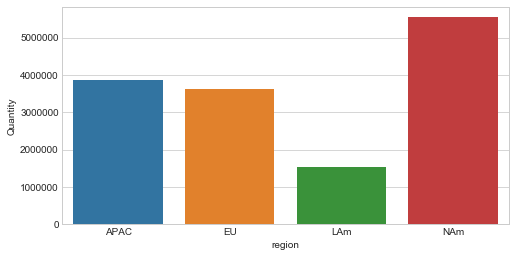

In [11]:
temp = pd.DataFrame(df.groupby(['region'], axis=0, as_index=False)['Quantity'].sum())
plt.figure(figsize=(8,4))
sns.barplot(x="region", y="Quantity",data=temp)

# 3.2 Which region has max profit

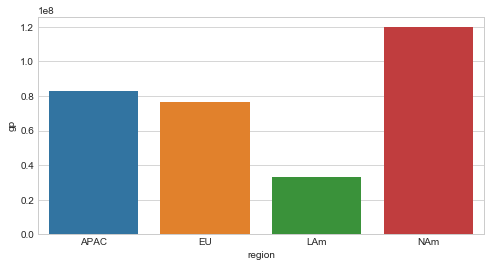

In [12]:
temp = pd.DataFrame(df.groupby(['region'], axis=0, as_index=False)['gp'].sum())
plt.figure(figsize=(8,4))
sns.barplot(x="region", y="gp",data=temp)

# 3.3 Which region has max profit per unit

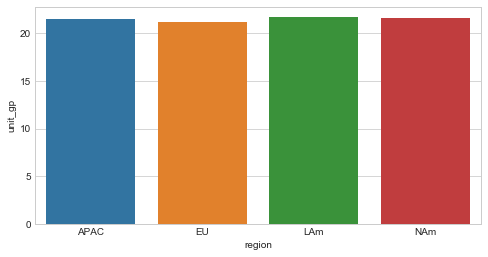

In [13]:
temp = pd.DataFrame(df.groupby(['region'], axis=0, as_index=False)[['gp','Quantity']].sum())
temp['unit_gp'] = temp['gp'] / temp['Quantity']
plt.figure(figsize=(8,4))
sns.barplot(x="region", y="unit_gp",data=temp)

# 3.4 Which region & order method has max sales

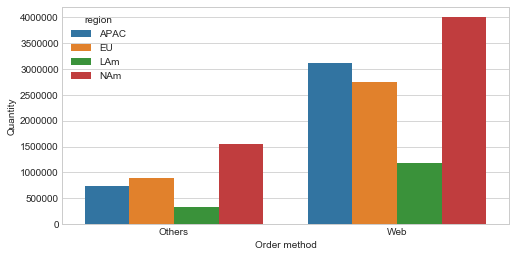

In [14]:
temp = pd.DataFrame(df.groupby(['region','Order method'], axis=0, as_index=False)['Quantity'].sum())
plt.figure(figsize=(8,4))
sns.barplot(x="Order method", y="Quantity", hue='region', data=temp)

# 3.5 Which product line has max sales

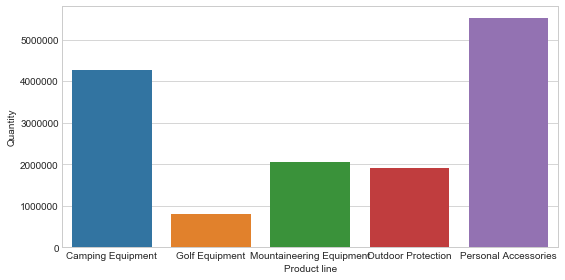

In [15]:
temp = pd.DataFrame(df.groupby(['Product line'], axis=0, as_index=False)['Quantity'].sum())
plt.figure(figsize=(8,4))
sns.barplot(x="Product line", y="Quantity",data=temp)
plt.tight_layout()

# 3.6 Which product line has max profit

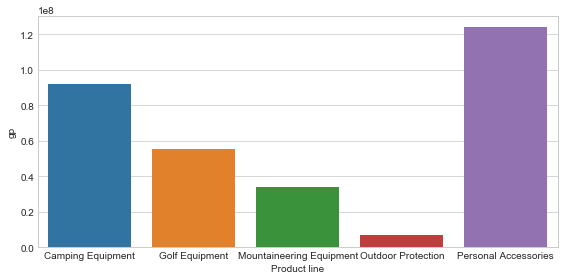

In [16]:
temp = pd.DataFrame(df.groupby(['Product line'], axis=0, as_index=False)['gp'].sum())
plt.figure(figsize=(8,4))
sns.barplot(x="Product line", y="gp",data=temp)
plt.tight_layout()

# 3.7 Which product line has max profit per unit 

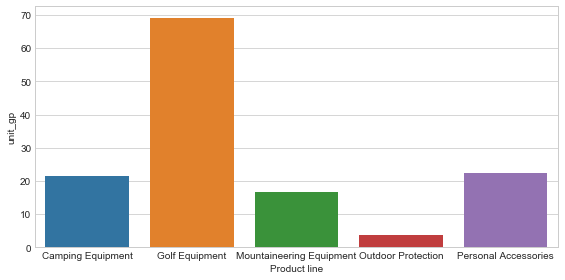

In [17]:
temp = pd.DataFrame(df.groupby(['Product line'], axis=0, as_index=False)[['gp','Quantity']].sum())
temp['unit_gp'] = temp['gp'] / temp['Quantity']
plt.figure(figsize=(8,4))
sns.barplot(x="Product line", y="unit_gp",data=temp)
plt.tight_layout()

# 3.8 Which product line & order method has max sales

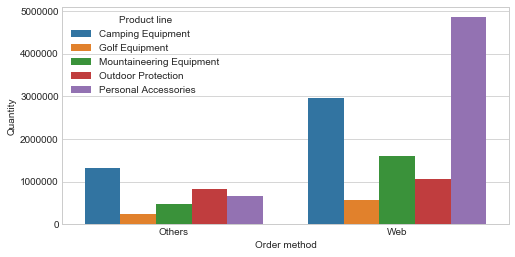

In [18]:
temp = pd.DataFrame(df.groupby(['Product line','Order method'], axis=0, as_index=False)['Quantity'].sum())
plt.figure(figsize=(8,4))
sns.barplot(x="Order method", y="Quantity", hue='Product line', data=temp)

# 3.9 Which region & product has max sales (top 5)

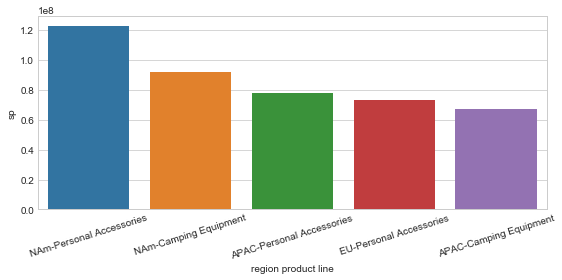

In [19]:
temp = pd.DataFrame(df.groupby(['region product line'], axis=0, as_index=False)['sp'].sum())
temp.sort_values('sp',axis=0, ascending=False, inplace=True)
plt.figure(figsize=(8,4))
sns.barplot(x="region product line", y="sp",data=temp.head())
plt.xticks(rotation=17.5)
plt.tight_layout()

# 3.10 Which region & product has max profit per unit  (top 5)

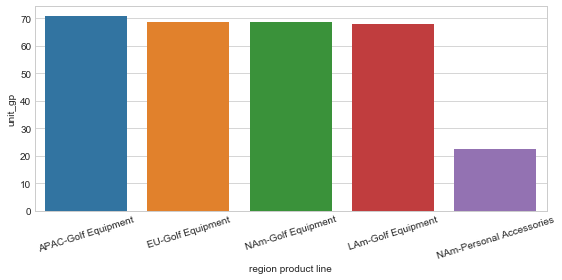

In [20]:
temp = pd.DataFrame(df.groupby(['region product line'], axis=0, as_index=False)[['gp','Quantity']].sum())
temp['unit_gp'] = temp['gp'] / temp['Quantity']
temp.sort_values('unit_gp',axis=0, ascending=False, inplace=True)
plt.figure(figsize=(8,4))
sns.barplot(x="region product line", y="unit_gp",data=temp.head())
plt.xticks(rotation=17.5)
plt.tight_layout()